In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set()

In [2]:
#import dataframes
df = pd.read_csv('df.csv')
dfdummy = pd.read_csv('dfdummy.csv')

In [3]:
#train test split
from sklearn.model_selection import train_test_split

features = dfdummy.drop('charges', axis =1)
target = dfdummy.charges.values

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [4]:
#train validation split
#X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,shuffle=True,test_size=0.225) #0.225 x 0.9 = 0.20

# Multiple Linear Regression

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso

In [76]:
def model_eval(alg):
    #predict
    y_train_pred = alg.predict(X_train)
    y_test_pred = alg.predict(X_test)
    
    #scores and errors
    print("Train R2 Score:", r2_score(y_train, y_train_pred))
    print("Test R2 Score:,", r2_score(y_test, y_test_pred))
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print("Train RMSE: %.4f" % train_rmse)
    print("Test RMSE: %.4f" % test_rmse)

In [20]:
#cross validation
cv_linreg=np.mean(cross_val_score(LinearRegression(), X_train, y_train, scoring='r2', cv=5))
print("CV Linear Regression R2 Score:", cv_linreg)

CV Linear Regression R2 Score: 0.7634917899088626


In [7]:
#train the algorithm
linreg = LinearRegression().fit(X_train, y_train)

#intercept:
print('Intercept:',linreg.intercept_)

Intercept: 5819.479420170084


In [9]:
#model evaluation
model_eval(linreg, X_train, y_train)

Train R2 Score: 0.7706401070063509
Test R2 Score:, 0.6822684542801885
Train RMSE: 5912.9926
Test RMSE: 6226.0428


Text(0, 0.5, 'Charges')

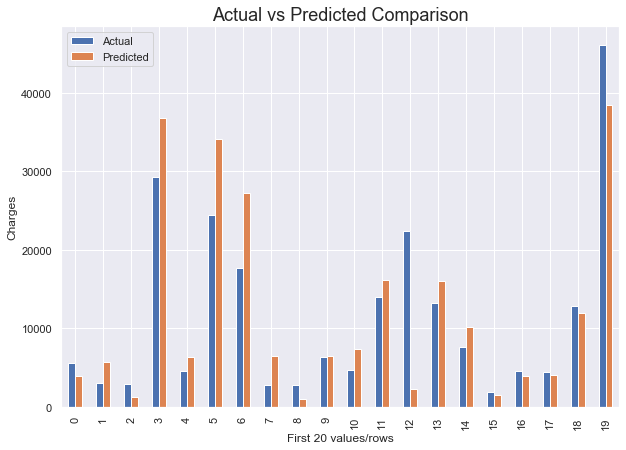

In [11]:
#compare actual and predicted values
df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': linreg.predict(X_test)})
df_compare_graph=df_compare.head(20)

#barplot of first 20 values of predicted and actual values
df_compare_graph.plot.bar(figsize=(10,7))
plt.title('Actual vs Predicted Comparison', fontsize=18)
plt.xlabel('First 20 values/rows')
plt.ylabel('Charges')

### Feature Scaling / Data Normalization

In [12]:
dfdummy.age.agg(['min','max'])

min    18
max    64
Name: age, dtype: int64

In [13]:
dfdummy.bmi.agg(['min','max'])

min    15.96
max    53.13
Name: bmi, dtype: float64

In [14]:
dfdummy.charges.agg(['min','max'])

min     1121.87390
max    63770.42801
Name: charges, dtype: float64

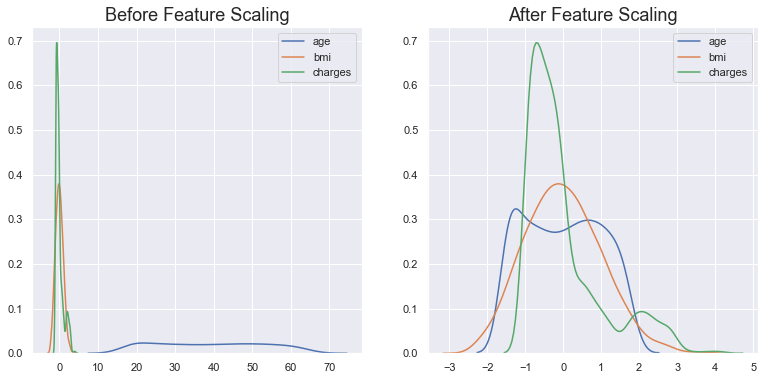

In [15]:
standard_scaler = StandardScaler()

scaled_df = pd.DataFrame(dfdummy)

std_charges = standard_scaler.fit_transform(scaled_df[['charges']])
std_bmi = standard_scaler.fit_transform(scaled_df[['bmi']])
std_age = standard_scaler.fit_transform(scaled_df[['age']])

scaled_df['age'] = std_age
scaled_df['bmi'] = std_bmi
scaled_df['charges'] = std_charges

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13, 6))

ax1.set_title('Before Feature Scaling',fontsize=18)
sns.kdeplot(dfdummy['age'], ax=ax1)
sns.kdeplot(dfdummy['bmi'], ax=ax1)
sns.kdeplot(dfdummy['charges'], ax=ax1)
ax2.set_title('After Feature Scaling',fontsize=18)
sns.kdeplot(scaled_df['age'], ax=ax2)
sns.kdeplot(scaled_df['bmi'], ax=ax2)
sns.kdeplot(scaled_df['charges'], ax=ax2)

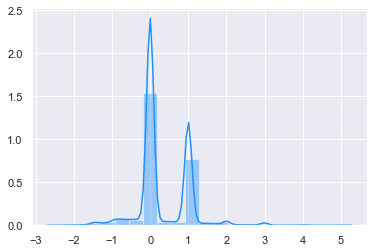

In [16]:
sns.distplot(scaled_df,color='dodgerblue',bins=20)

# Polynomial Regression

In [17]:
def create_polynomial_regression_model(degree):
    """
    Creates a polynomial regression model for the given degree
    :param degree: integer
    :return: r2 score and rmse
    """
  
    poly_features = PolynomialFeatures(degree=degree)

    # transforms the existing features to higher degree features
    X_train_poly = poly_features.fit_transform(X_train)

    # fit the transformed features to Linear Regression
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)

    # predicting on training data-set
    y_train_predict = poly_model.predict(X_train_poly)

    # predicting on test data-set
    y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))

    # evaluating the model on training dataset
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predict))
    r2_train = r2_score(y_train, y_train_predict)

    # evaluating the model on test dataset
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
    r2_test = r2_score(y_test, y_test_predict)

    print("Polynomial Regression with degree of", degree, '\n')
    print("Train R2 score: {}".format(r2_train))
    print("Test R2 score: {}".format(r2_test))
    print("Train RMSE: {}".format(rmse_train))
    print("Test RMSE: {}".format(rmse_test))

In [18]:
#test degree 2
create_polynomial_regression_model(2)

Polynomial Regression with degree of 2 

Train R2 score: 0.8868061818925435
Test R2 score: 0.7952583797239499
Train RMSE: 4153.937451223817
Test RMSE: 4997.870569951244


In [19]:
#test degree 3
create_polynomial_regression_model(3)

Polynomial Regression with degree of 3 

Train R2 score: 0.9001218916715137
Test R2 score: -1942471914579.7546
Train RMSE: 3901.968439165957
Test RMSE: 15394277507.522825


In [21]:
#degree 2 gave best score
#cross validation
poly_reg = PolynomialFeatures(degree = 2)
X_train_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_train_poly, y_train)

regressor_poly2 = LinearRegression()
regressor_poly2.fit(X_train_poly, y_train)
cv_poly=np.mean(cross_val_score(regressor_poly2, X_train_poly, y_train, scoring='r2',cv = 5))
print("CV Polynomial Regression R2 Score:", cv_poly)

CV Polynomial Regression R2 Score: 0.7382219289269372


# Lasso Regression

In [22]:
#cross validation
cv_lasso=np.mean(cross_val_score(Lasso(),X_train,y_train, scoring = 'r2', cv=5))
print("CV Lasso Regression R2 Score:", cv_lasso)

CV Lasso Regression R2 Score: 0.7635756065323271


In [23]:
#model performance
lasso = Lasso()
lasso.fit(X_train,y_train)
model_eval(lasso,X_train, y_train)

Train R2 Score: 0.7706389234628741
Test R2 Score:, 0.6822484419535169
Train RMSE: 5913.0079
Test RMSE: 6226.2389


In [24]:
#find best param
from sklearn.model_selection import GridSearchCV

lasso= Lasso(tol=1)
param={
    'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]
}
grid=GridSearchCV(lasso, param, scoring='r2', cv=5).fit(X_train,y_train)

print(grid.best_params_)
print(grid.best_score_)

{'alpha': 20}
0.7627926287978453


In [25]:
#performance
model_eval(grid,X_train,y_train)

Train R2 Score: 0.7688207607072034
Test R2 Score:, 0.6793717467590837
Train RMSE: 5936.3980
Test RMSE: 6254.3594


## Model Validation

### Linearity

#### Relationship between the features and target variable should be linear.

Text(0.5, 1.0, 'Actual vs. Predicted')

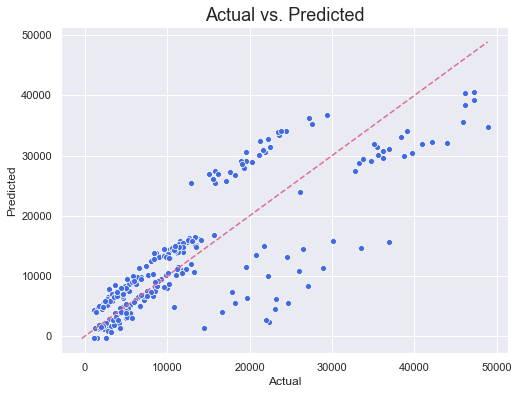

In [26]:
#plot actual vs predicted values
plt.figure(figsize=(8,6))
sns.scatterplot(x='Actual', y='Predicted', data=df_compare, color="royalblue")
        
#plot diagonal line
line_coords = np.arange(df_compare.min().min(), df_compare.max().max())
plt.plot(line_coords, line_coords,  # X and y points
         color='palevioletred', linestyle='--')
plt.title('Actual vs. Predicted', fontsize=18)

### Residual Error Distribution and Mean

#### Residual error plot should be normally distributed with a mean of (or close to) 0.

In [25]:
#check histogram and p value from Anderson Darling test for normality

In [27]:
df_compare['Residuals'] = abs(df_compare['Actual']) - abs(df_compare['Predicted'])

In [28]:
df_compare.Residuals.mean()

-207.5731039594692

p-value from the test - below 0.05 generally means non-normal: 5.0559650777625794e-23
Residuals are not normally distributed

Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables


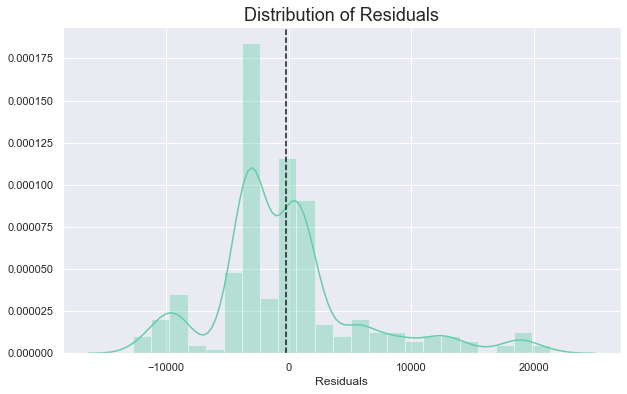

In [29]:
from statsmodels.stats.diagnostic import normal_ad
p_value_thresh=0.05
# Performing the test on the residuals
p_value = normal_ad(df_compare['Residuals'])[1]
print('p-value from the test - below 0.05 generally means non-normal:', p_value)
    
# Reporting the normality of the residuals
if p_value < p_value_thresh:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')
    
# Plot the residuals distribution and mean
fig = plt.figure(figsize=(10,6))
ax = fig.subplots()
plt.title('Distribution of Residuals', fontsize=18)
sns.distplot(df_compare.Residuals, ax=ax, color='mediumaquamarine')
ax.axvline(df_compare.Residuals.mean(), color='k', linestyle='--')

print()
if p_value > p_value_thresh:
    print('Assumption satisfied')
else:
    print('Assumption not satisfied')
    print()
    print('Confidence intervals will likely be affected')
    print('Try performing nonlinear transformations on variables')

In [30]:
# model is biasing toward underestimating

### Multicollinearity

#### Predictors should not be correlated with each other

In [31]:
#Variance Inflation Factor

In [33]:
VIF = 1/(1- (r2_score(y_test, linreg.predict(X_test))))
print("VIF:", VIF, "\n")

if VIF == 1:
    print("No Correlation")
elif VIF > 1 and VIF <5:
    print("Moderately Correlated")
else:
    print("High Level of Multicollinearity")

VIF: 3.147311034963586 

Moderately Correlated


In [34]:
columns = X_train.columns
predictors = X_train.values

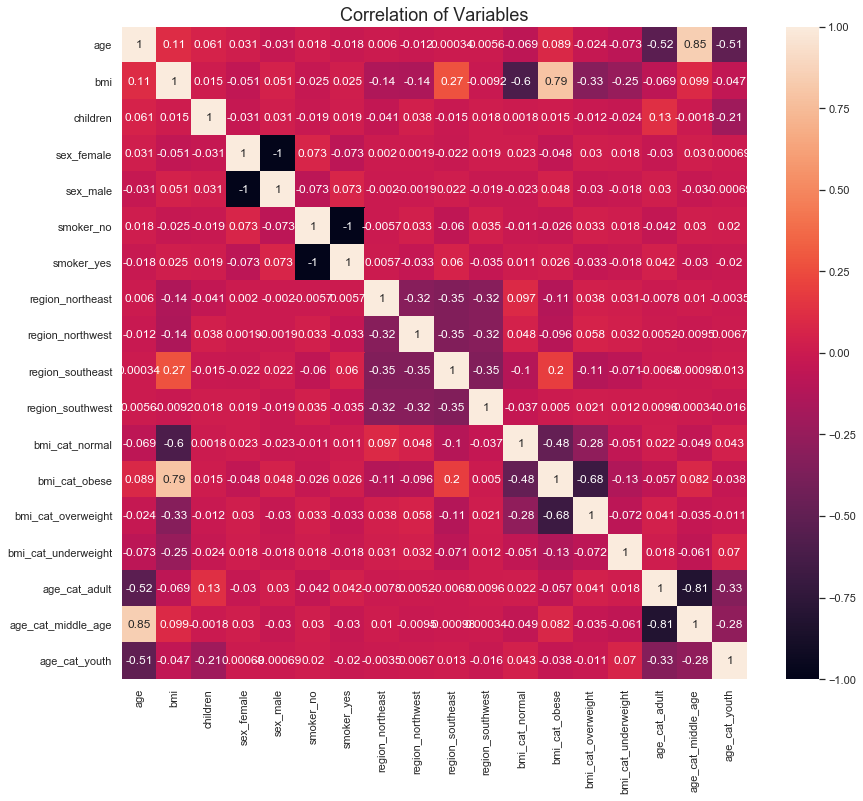

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


age: 4.9103284603914545
bmi: 3.7780057959631113
children: 1.0546222067549942
sex_female: inf
sex_male: inf
smoker_no: inf
smoker_yes: inf
region_northeast: inf
region_northwest: inf
region_southeast: inf
region_southwest: inf
bmi_cat_normal: inf
bmi_cat_obese: inf
bmi_cat_overweight: inf
bmi_cat_underweight: inf
age_cat_adult: inf
age_cat_middle_age: inf
age_cat_youth: inf

15 cases of possible multicollinearity
15 cases of definite multicollinearity

Assumption not satisfied

Coefficient interpretability will be problematic
Consider removing variables with a high Variance Inflation Factor (VIF)


In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
        
# Plotting the heatmap
plt.figure(figsize = (14,12))
sns.heatmap(pd.DataFrame(predictors, columns=columns).corr(), annot=True)
plt.title('Correlation of Variables',fontsize=18)
plt.show()
        
print('Variance Inflation Factors (VIF)')
print('> 10: An indication that multicollinearity may be present')
print('> 100: Certain multicollinearity among the variables')
print('-------------------------------------')
       
# Gathering the VIF for each variable
VIF = [variance_inflation_factor(predictors, i) for i in range(X_train.shape[1])]
for idx, vif in enumerate(VIF):
    print('{0}: {1}'.format(columns[idx], vif))
        
# Gathering and printing total cases of possible or definite multicollinearity
possible_multicollinearity = sum([1 for vif in VIF if vif > 10])
definite_multicollinearity = sum([1 for vif in VIF if vif > 100])
print()
print('{0} cases of possible multicollinearity'.format(possible_multicollinearity))
print('{0} cases of definite multicollinearity'.format(definite_multicollinearity))
print()

if definite_multicollinearity == 0:
    if possible_multicollinearity == 0:
        print('Assumption satisfied')
    else:
        print('Assumption possibly satisfied')
        print()
        print('Coefficient interpretability may be problematic')
        print('Consider removing variables with a high Variance Inflation Factor (VIF)')

else:
    print('Assumption not satisfied')
    print()
    print('Coefficient interpretability will be problematic')
    print('Consider removing variables with a high Variance Inflation Factor (VIF)')

### Autocorrelation

#### There should be no autocorrelation in the residuals

In [36]:
from statsmodels.stats.stattools import durbin_watson
print('Assumption 4: No Autocorrelation', '\n')

print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
print('0 to 2< is positive autocorrelation')
print('>2 to 4 is negative autocorrelation')
print('-------------------------------------')
durbinWatson = durbin_watson(df_compare['Residuals'])
print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')

Assumption 4: No Autocorrelation 

Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 1.8960127334775
Little to no autocorrelation 

Assumption satisfied


### Homoscedasticity

#### Residuals should have relative constant variance

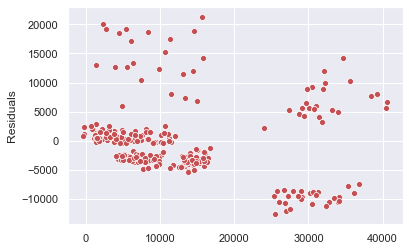

In [38]:
#check residuals are equal across regression line
sns.scatterplot(y = df_compare.Residuals, x= linreg.predict(X_test),color='r') 

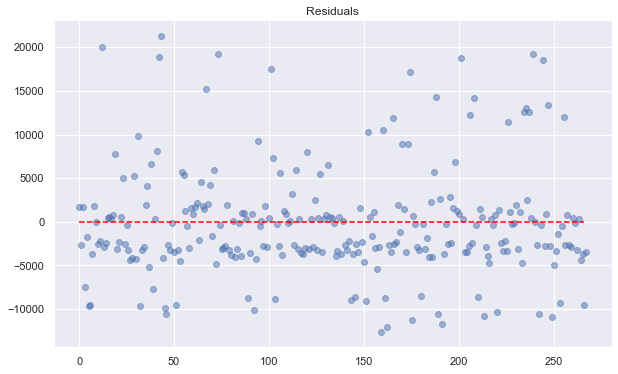

In [39]:
# Plot the residuals
plt.subplots(figsize=(10, 6))
ax = plt.subplot(111)  # remove spines
plt.scatter(x=df_compare.index, y=df_compare.Residuals, alpha=0.5)
plt.plot(np.repeat(0, df_compare.index.max()), color='red', linestyle='--')
ax.spines['right'].set_visible(False)  # Removing the right spine
ax.spines['top'].set_visible(False)  # Removing the top spine
plt.title('Residuals')
plt.show()  

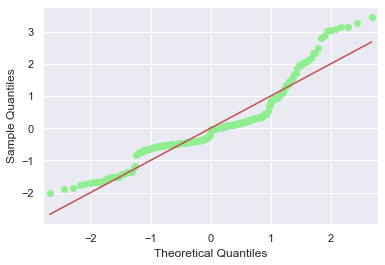

In [56]:
#Multivariate normality 
#Quantile-Quantile plot 
from statsmodels.graphics.gofplots import qqplot
ax=qqplot(df_compare.Residuals, fit=True,line='s',color='lightgreen')

## Backward Elimination

In [ ]:
#Significance Level = 0.05. If p-val > SL, remove predictor.

In [57]:
X_train_be=np.append(arr=np.ones([X_train.shape[0],1]).astype(int), values = X_train, axis = 1)

In [58]:
#prepare X_train and X_test for Backward elimination
X_train_B = np.append(np.ones((len(X_train),1)).astype(int),X_train,1)
X_test_B = np.append(np.ones((len(X_test),1)).astype(int),X_test,1)

In [71]:
#fit model on all features
X_opt=X_train_B[:,:]
model_MLR=sm.OLS(endog=y_train,exog=X_opt).fit()
model_MLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     252.6
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          5.85e-313
Time:                        20:41:15   Log-Likelihood:                -10827.
No. Observations:                1070   AIC:                         2.168e+04
Df Residuals:                    1056   BIC:                         2.175e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1978.9170    670.425      2.952      0.003     663.401    3294.434
x1           222.2449     28.997      7.664      0.000     165.347     279.143
x2           150.4939     60.137      2.503      0.012      32.493     268.495
x3           568.1266    156.339      3.634      0.000     261.356     874.897
x4          1056.8954    384.516      2.749      0.006     302.392    1811.398
x5           922.0217    382.181      2.413      0.016     172.101    1671.943
x6         -1.091e+04    385.658    -28.292      0.000   -1.17e+04   -1.02e+04
x7          1.289e+04    425.848     30.269      0.000    1.21e+04    1.37e+04
x8          1123.7102    356.386      3.153      0.002     424.404    1823.016
x9           608.3336    346.094      1.758      0.079     -70.777    1287.444
x10           46.4032    400.357      0.116      0.908    -739.182     831.988
x11          200.4699    364.480      0.550      0.582    -514.718     915.658
x12         -747.3366    497.181     -1.503      0.133   -1722.912     228.239
x13         2609.0074    805.404      3.239      0.001    1028.633    4189.382
x14         -276.4931    513.162     -0.539      0.590   -1283.427     730.441
x15          393.7393   1164.711      0.338      0.735   -1891.672    2679.151
x16           82.8772    334.396      0.248      0.804    -573.279     739.034
x17         1372.8287    755.973      1.816      0.070    -110.550    2856.208
x18          523.2112    586.536      0.892      0.373    -627.698    1674.120
==============================================================================
Omnibus:                      280.477   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              739.911
Skew:                           1.355   Prob(JB):                    2.14e-161
Kurtosis:                       6.042   Cond. No.                     1.01e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.75e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [72]:
col_delete=10
cols_keep=[]
for x in range(X_opt.shape[1]):
    if x != col_delete :
        cols_keep.append(x)
X_opt = X_opt[:,cols_keep]
X_test_B = X_test_B[:,cols_keep]
model_MLR=sm.OLS(endog=y_train,exog=X_opt).fit()
model_MLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     252.6
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          5.85e-313
Time:                        20:42:07   Log-Likelihood:                -10827.
No. Observations:                1070   AIC:                         2.168e+04
Df Residuals:                    1056   BIC:                         2.175e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1996.8796    770.748      2.591      0.010     484.508    3509.251
x1           222.2449     28.997      7.664      0.000     165.347     279.143
x2           150.4939     60.137      2.503      0.012      32.493     268.495
x3           568.1266    156.339      3.634      0.000     261.356     874.897
x4          1065.8766    429.900      2.479      0.013     222.321    1909.432
x5           931.0029    425.902      2.186      0.029      95.292    1766.714
x6          -1.09e+04    430.354    -25.333      0.000   -1.17e+04   -1.01e+04
x7           1.29e+04    466.010     27.680      0.000     1.2e+04    1.38e+04
x8          1077.3070    543.092      1.984      0.048      11.644    2142.970
x9           561.9304    536.395      1.048      0.295    -490.590    1614.451
x10          154.0667    535.665      0.288      0.774    -897.022    1205.156
x11         -742.8460    496.977     -1.495      0.135   -1718.022     232.330
x12         2613.4980    820.889      3.184      0.001    1002.740    4224.256
x13         -272.0024    523.859     -0.519      0.604   -1299.924     755.920
x14          398.2299   1164.743      0.342      0.732   -1887.243    2683.703
x15           88.8647    353.471      0.251      0.802    -604.721     782.451
x16         1378.8162    774.869      1.779      0.075    -141.642    2899.275
x17          529.1987    591.752      0.894      0.371    -631.945    1690.342
==============================================================================
Omnibus:                      280.477   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              739.911
Skew:                           1.355   Prob(JB):                    2.14e-161
Kurtosis:                       6.042   Cond. No.                     6.08e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.6e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [73]:
col_delete=15
cols_keep=[]
for x in range(X_opt.shape[1]):
    if x != col_delete :
        cols_keep.append(x)
X_opt = X_opt[:,cols_keep]
X_test_B = X_test_B[:,cols_keep]
model_MLR=sm.OLS(endog=y_train,exog=X_opt).fit()
model_MLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     252.6
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          5.85e-313
Time:                        20:42:44   Log-Likelihood:                -10827.
No. Observations:                1070   AIC:                         2.168e+04
Df Residuals:                    1056   BIC:                         2.175e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2036.3750    869.975      2.341      0.019     329.298    3743.452
x1           222.2449     28.997      7.664      0.000     165.347     279.143
x2           150.4939     60.137      2.503      0.012      32.493     268.495
x3           568.1266    156.339      3.634      0.000     261.356     874.897
x4          1085.6243    475.235      2.284      0.023     153.112    2018.137
x5           950.7506    470.915      2.019      0.044      26.715    1874.786
x6         -1.088e+04    473.020    -23.006      0.000   -1.18e+04   -9954.271
x7          1.292e+04    509.926     25.335      0.000    1.19e+04    1.39e+04
x8          1077.3070    543.092      1.984      0.048      11.644    2142.970
x9           561.9304    536.395      1.048      0.295    -490.590    1614.451
x10          154.0667    535.665      0.288      0.774    -897.022    1205.156
x11         -732.9721    495.217     -1.480      0.139   -1704.694     238.750
x12         2623.3719    839.977      3.123      0.002     975.159    4271.585
x13         -262.1286    533.903     -0.491      0.624   -1309.760     785.503
x14          408.1038   1164.794      0.350      0.726   -1877.471    2693.678
x15         1289.9516    747.090      1.727      0.085    -175.997    2755.900
x16          440.3340    762.520      0.577      0.564   -1055.894    1936.562
==============================================================================
Omnibus:                      280.477   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              739.911
Skew:                           1.355   Prob(JB):                    2.14e-161
Kurtosis:                       6.042   Cond. No.                     7.52e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.96e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [74]:
col_delete=10
cols_keep=[]
for x in range(X_opt.shape[1]):
    if x != col_delete :
        cols_keep.append(x)
X_opt = X_opt[:,cols_keep]
X_test_B = X_test_B[:,cols_keep]
model_MLR=sm.OLS(endog=y_train,exog=X_opt).fit()
model_MLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     273.9
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          3.60e-314
Time:                        20:43:06   Log-Likelihood:                -10827.
No. Observations:                1070   AIC:                         2.168e+04
Df Residuals:                    1057   BIC:                         2.174e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2102.1633    839.003      2.506      0.012     455.863    3748.464
x1           222.1430     28.982      7.665      0.000     165.274     279.012
x2           147.8576     59.408      2.489      0.013      31.286     264.429
x3           570.3470    156.080      3.654      0.000     264.084     876.610
x4          1119.5014    460.208      2.433      0.015     216.477    2022.526
x5           982.6619    457.459      2.148      0.032      85.030    1880.294
x6         -1.085e+04    455.317    -23.820      0.000   -1.17e+04   -9952.340
x7          1.295e+04    499.557     25.919      0.000     1.2e+04    1.39e+04
x8           998.4490    468.600      2.131      0.033      78.958    1917.941
x9           482.4370    459.507      1.050      0.294    -419.213    1384.087
x10         -726.3419    494.466     -1.469      0.142   -1696.588     243.905
x11         2653.0104    833.270      3.184      0.001    1017.959    4288.061
x12         -240.8936    528.544     -0.456      0.649   -1278.009     796.221
x13          416.3884   1163.933      0.358      0.721   -1867.493    2700.270
x14         1294.8323    746.573      1.734      0.083    -170.101    2759.765
x15          439.7408    762.187      0.577      0.564   -1055.830    1935.312
==============================================================================
Omnibus:                      280.177   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              738.473
Skew:                           1.354   Prob(JB):                    4.39e-161
Kurtosis:                       6.038   Cond. No.                     1.09e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.37e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [75]:
col_delete=13
cols_keep=[]
for x in range(X_opt.shape[1]):
    if x != col_delete :
        cols_keep.append(x)
X_opt = X_opt[:,cols_keep]
X_test_B = X_test_B[:,cols_keep]
model_MLR=sm.OLS(endog=y_train,exog=X_opt).fit()
model_MLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     273.9
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          3.60e-314
Time:                        20:43:39   Log-Likelihood:                -10827.
No. Observations:                1070   AIC:                         2.168e+04
Df Residuals:                    1057   BIC:                         2.174e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2310.3575   1023.675      2.257      0.024     301.691    4319.024
x1           222.1430     28.982      7.665      0.000     165.274     279.012
x2           147.8576     59.408      2.489      0.013      31.286     264.429
x3           570.3470    156.080      3.654      0.000     264.084     876.610
x4          1223.5985    541.849      2.258      0.024     160.377    2286.820
x5          1086.7590    547.223      1.986      0.047      12.993    2160.525
x6         -1.074e+04    539.658    -19.905      0.000   -1.18e+04   -9682.748
x7          1.305e+04    581.062     22.462      0.000    1.19e+04    1.42e+04
x8           998.4490    468.600      2.131      0.033      78.958    1917.941
x9           482.4370    459.507      1.050      0.294    -419.213    1384.087
x10        -1142.7303   1524.553     -0.750      0.454   -4134.225    1848.764
x11         2236.6219   1776.791      1.259      0.208   -1249.816    5723.060
x12         -657.2820   1581.153     -0.416      0.678   -3759.837    2445.273
x13         1294.8323    746.573      1.734      0.083    -170.101    2759.765
x14          439.7408    762.187      0.577      0.564   -1055.830    1935.312
==============================================================================
Omnibus:                      280.177   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              738.473
Skew:                           1.354   Prob(JB):                    4.39e-161
Kurtosis:                       6.038   Cond. No.                     1.30e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.67e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [76]:
col_delete=12
cols_keep=[]
for x in range(X_opt.shape[1]):
    if x != col_delete :
        cols_keep.append(x)
X_opt = X_opt[:,cols_keep]
X_test_B = X_test_B[:,cols_keep]
model_MLR=sm.OLS(endog=y_train,exog=X_opt).fit()
model_MLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     299.0
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          2.22e-315
Time:                        20:43:54   Log-Likelihood:                -10827.
No. Observations:                1070   AIC:                         2.168e+04
Df Residuals:                    1058   BIC:                         2.174e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2126.0767    922.348      2.305      0.021     316.237    3935.917
x1           221.8799     28.964      7.661      0.000     165.047     278.713
x2           138.9033     55.344      2.510      0.012      30.307     247.500
x3           570.0102    156.017      3.654      0.000     263.872     876.149
x4          1134.2268    497.177      2.281      0.023     158.662    2109.792
x5           991.8499    497.124      1.995      0.046      16.388    1967.312
x6         -1.083e+04    491.212    -22.056      0.000   -1.18e+04   -9870.534
x7          1.296e+04    537.491     24.113      0.000    1.19e+04     1.4e+04
x8          1002.6686    468.307      2.141      0.032      83.753    1921.584
x9           473.3675    458.809      1.032      0.302    -426.912    1373.647
x10         -562.7678    614.422     -0.916      0.360   -1768.391     642.856
x11         2930.1156    611.221      4.794      0.000    1730.772    4129.459
x12         1298.8945    746.217      1.741      0.082    -165.339    2763.128
x13          446.1596    761.732      0.586      0.558   -1048.518    1940.837
==============================================================================
Omnibus:                      279.919   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              735.804
Skew:                           1.354   Prob(JB):                    1.67e-160
Kurtosis:                       6.029   Cond. No.                     8.17e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.21e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [77]:
col_delete=13
cols_keep=[]
for x in range(X_opt.shape[1]):
    if x != col_delete :
        cols_keep.append(x)
X_opt = X_opt[:,cols_keep]
X_test_B = X_test_B[:,cols_keep]
model_MLR=sm.OLS(endog=y_train,exog=X_opt).fit()
model_MLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     329.1
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          1.42e-316
Time:                        20:44:21   Log-Likelihood:                -10827.
No. Observations:                1070   AIC:                         2.168e+04
Df Residuals:                    1059   BIC:                         2.173e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2305.6948    869.606      2.651      0.008     599.348    4012.041
x1           213.2039     24.882      8.569      0.000     164.380     262.027
x2           138.1700     55.313      2.498      0.013      29.635     246.705
x3           556.7523    154.319      3.608      0.000     253.947     859.557
x4          1224.9777    472.271      2.594      0.010     298.284    2151.672
x5          1080.7171    473.258      2.284      0.023     152.086    2009.348
x6         -1.075e+04    468.039    -22.962      0.000   -1.17e+04   -9828.947
x7          1.305e+04    513.576     25.416      0.000     1.2e+04    1.41e+04
x8          1005.6544    468.134      2.148      0.032      87.080    1924.229
x9           480.3968    458.510      1.048      0.295    -419.295    1380.088
x10         -563.1433    614.231     -0.917      0.359   -1768.391     642.104
x11         2945.4095    610.474      4.825      0.000    1747.534    4143.285
x12         1434.6253    709.103      2.023      0.043      43.219    2826.031
==============================================================================
Omnibus:                      278.767   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              728.744
Skew:                           1.351   Prob(JB):                    5.69e-159
Kurtosis:                       6.008   Cond. No.                     1.06e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.52e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [78]:
col_delete=10
cols_keep=[]
for x in range(X_opt.shape[1]):
    if x != col_delete :
        cols_keep.append(x)
X_opt = X_opt[:,cols_keep]
X_test_B = X_test_B[:,cols_keep]
model_MLR=sm.OLS(endog=y_train,exog=X_opt).fit()
model_MLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     365.6
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          1.09e-317
Time:                        20:44:40   Log-Likelihood:                -10828.
No. Observations:                1070   AIC:                         2.168e+04
Df Residuals:                    1060   BIC:                         2.173e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1941.3354    773.425      2.510      0.012     423.717    3458.954
x1           213.8191     24.871      8.597      0.000     165.017     262.621
x2           158.0112     50.899      3.104      0.002      58.136     257.886
x3           551.6896    154.208      3.578      0.000     249.102     854.278
x4          1044.8506    429.433      2.433      0.015     202.215    1887.486
x5           896.4849    428.447      2.092      0.037      55.784    1737.185
x6         -1.092e+04    428.314    -25.496      0.000   -1.18e+04   -1.01e+04
x7          1.286e+04    469.186     27.413      0.000    1.19e+04    1.38e+04
x8          1003.2172    468.091      2.143      0.032      84.727    1921.707
x9           504.0300    457.751      1.101      0.271    -394.170    1402.230
x10         2955.6012    610.327      4.843      0.000    1758.015    4153.187
x11         1416.2421    708.766      1.998      0.046      25.499    2806.986
==============================================================================
Omnibus:                      275.933   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              718.019
Skew:                           1.339   Prob(JB):                    1.21e-156
Kurtosis:                       5.989   Cond. No.                     7.82e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.59e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
col_delete=10
cols_keep=[]
for x in range(X_opt.shape[1]):
    if x != col_delete :
        cols_keep.append(x)
X_opt = X_opt[:,cols_keep]
X_test_B = X_test_B[:,cols_keep]
model_MLR=sm.OLS(endog=y_train,exog=X_opt).fit()
model_MLR.summary()

In [79]:
col_delete=9
cols_keep=[]
for x in range(X_opt.shape[1]):
    if x != col_delete :
        cols_keep.append(x)
X_opt = X_opt[:,cols_keep]
X_test_B = X_test_B[:,cols_keep]
model_MLR=sm.OLS(endog=y_train,exog=X_opt).fit()
model_MLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     411.1
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          9.57e-319
Time:                        20:45:11   Log-Likelihood:                -10828.
No. Observations:                1070   AIC:                         2.167e+04
Df Residuals:                    1061   BIC:                         2.172e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2147.1470    750.575      2.861      0.004     674.367    3619.927
x1           214.3077     24.870      8.617      0.000     165.509     263.107
x2           148.8843     50.225      2.964      0.003      50.333     247.436
x3           553.9382    154.210      3.592      0.000     251.347     856.530
x4          1154.1384    417.848      2.762      0.006     334.237    1974.040
x5           993.0086    419.425      2.368      0.018     170.011    1816.006
x6         -1.081e+04    415.567    -26.003      0.000   -1.16e+04   -9990.465
x7          1.295e+04    461.826     28.047      0.000     1.2e+04    1.39e+04
x8           814.0550    435.470      1.869      0.062     -40.425    1668.535
x9          2990.8228    609.549      4.907      0.000    1794.764    4186.881
x10         1409.3480    708.809      1.988      0.047      18.521    2800.175
==============================================================================
Omnibus:                      276.201   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              720.279
Skew:                           1.339   Prob(JB):                    3.92e-157
Kurtosis:                       5.997   Cond. No.                     5.45e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.44e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [80]:
col_delete=5
cols_keep=[]
for x in range(X_opt.shape[1]):
    if x != col_delete :
        cols_keep.append(x)
X_opt = X_opt[:,cols_keep]
X_test_B = X_test_B[:,cols_keep]
model_MLR=sm.OLS(endog=y_train,exog=X_opt).fit()
model_MLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     411.1
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          9.57e-319
Time:                        20:45:30   Log-Likelihood:                -10828.
No. Observations:                1070   AIC:                         2.167e+04
Df Residuals:                    1061   BIC:                         2.172e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2809.1527   1008.962      2.784      0.005     829.365    4788.940
x1           214.3077     24.870      8.617      0.000     165.509     263.107
x2           148.8843     50.225      2.964      0.003      50.333     247.436
x3           553.9382    154.210      3.592      0.000     251.347     856.530
x4           161.1298    371.033      0.434      0.664    -566.912     889.172
x5         -1.047e+04    530.790    -19.735      0.000   -1.15e+04   -9433.371
x6          1.328e+04    575.814     23.070      0.000    1.22e+04    1.44e+04
x7           814.0550    435.470      1.869      0.062     -40.425    1668.535
x8          2990.8228    609.549      4.907      0.000    1794.764    4186.881
x9          1409.3480    708.809      1.988      0.047      18.521    2800.175
==============================================================================
Omnibus:                      276.201   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              720.279
Skew:                           1.339   Prob(JB):                    3.92e-157
Kurtosis:                       5.997   Cond. No.                     3.98e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.77e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [81]:
col_delete=4
cols_keep=[]
for x in range(X_opt.shape[1]):
    if x != col_delete :
        cols_keep.append(x)
X_opt = X_opt[:,cols_keep]
X_test_B = X_test_B[:,cols_keep]
model_MLR=sm.OLS(endog=y_train,exog=X_opt).fit()
model_MLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     470.1
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          4.68e-320
Time:                        20:46:16   Log-Likelihood:                -10829.
No. Observations:                1070   AIC:                         2.167e+04
Df Residuals:                    1062   BIC:                         2.171e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2864.9242   1000.373      2.864      0.004     901.992    4827.856
x1           214.4466     24.858      8.627      0.000     165.670     263.223
x2           148.5940     50.201      2.960      0.003      50.089     247.099
x3           551.1243    154.015      3.578      0.000     248.916     853.333
x4         -1.044e+04    524.285    -19.912      0.000   -1.15e+04   -9410.714
x5           1.33e+04    573.685     23.191      0.000    1.22e+04    1.44e+04
x6           814.4371    435.303      1.871      0.062     -39.714    1668.588
x7          2985.6889    609.201      4.901      0.000    1790.314    4181.064
x8          1408.9306    708.538      1.989      0.047      18.638    2799.223
==============================================================================
Omnibus:                      276.849   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              723.824
Skew:                           1.341   Prob(JB):                    6.66e-158
Kurtosis:                       6.007   Cond. No.                     4.00e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.75e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
# backward elimination stops here. All p values are less than 0.05

In [82]:
cols_keep

[0, 1, 2, 3, 5, 6, 7, 8, 9]

In [98]:
X_train.columns

Index(['age', 'bmi', 'children', 'sex_female', 'sex_male', 'smoker_no',
       'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest', 'bmi_cat_normal',
       'bmi_cat_obese', 'bmi_cat_overweight', 'bmi_cat_underweight',
       'age_cat_adult', 'age_cat_middle_age', 'age_cat_youth'],
      dtype='object')

In [108]:
print(X_train.columns[:4])
print(X_train.columns[5:10])

Index(['age', 'bmi', 'children', 'sex_female'], dtype='object')
Index(['smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast'],
      dtype='object')


In [60]:
#creating new dataframe with features selected from backward elimination
new_df_be = dfdummy[['age', 'bmi', 'children', 'sex_female','smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast','charges']]

In [61]:
#separating data into features and target
X_new=new_df_be.drop('charges',axis=1).values
y_new=new_df_be.charges.values

In [62]:
from sklearn.preprocessing import StandardScaler

In [70]:
#train test split
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_new, y_new, test_size = 0.2, random_state = 0)
scaler = StandardScaler()
scaled_new_df = pd.DataFrame(new_df_be)
std_charges = scaler.fit_transform(scaled_new_df[['charges']])
std_bmi = scaler.fit_transform(scaled_new_df[['bmi']])
std_age = scaler.fit_transform(scaled_new_df[['age']])

linreg_scaled_be = LinearRegression().fit(X_train_reduced,y_train_reduced)

#cross validation
cv_linreg_elim=np.mean(cross_val_score(linreg_scaled_be,X_train_reduced,y_train_reduced,scoring='r2',cv=5))
print("CV Linear Regression (Backward Elim) R2 Score:", cv_linreg_elim)

#predict on scaled and selected features from backward elimination
y_train_pred = linreg_scaled_be.predict(X_train_reduced)
y_test_pred = linreg_scaled_be.predict(X_test_reduced)
    
#scores and errors
print("Train R2 Score:", r2_score(y_train_reduced, y_train_pred))
print("Test R2 Score:,", r2_score(y_test_reduced, y_test_pred))
train_rmse = np.sqrt(mean_squared_error(y_train_reduced, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test_reduced, y_test_pred))
print("Train RMSE: %.4f" % train_rmse)
print("Test RMSE: %.4f" % test_rmse)

CV Linear Regression (Backward Elim) R2 Score: 0.7304378077110828
Train R2 Score: 0.7370262574551635
Test R2 Score:, 0.7999876970680433
Train RMSE: 0.5072
Test RMSE: 0.4660


# Compare Algorithms

In [88]:
#compare the 4 models by cross validation scores
from sklearn import model_selection

outcome = []
model_names = []
models = [('Linear Regression', cv_linreg), 
          ('Linear Regresion Backward Elim', cv_linreg_elim), 
          ('Polynomial Regression', cv_poly),
          ('Lasso', cv_lasso)]

In [96]:
algorithms = pd.DataFrame(data = models, columns=['Model','CV'])
algorithms

,Model,CV
0,Linear Regression,0.763492
1,Linear Regresion Backward Elim,0.730438
2,Polynomial Regression,0.738222
3,Lasso,0.763576


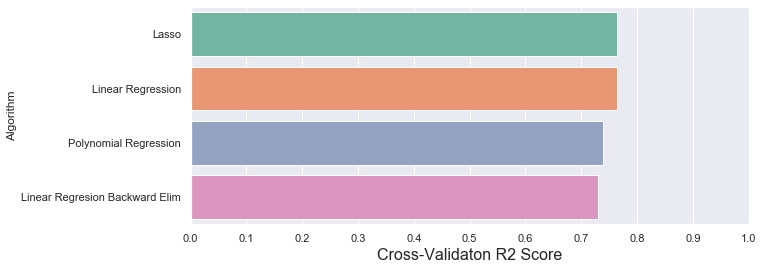

In [103]:
f, axe = plt.subplots(1,1, figsize=(10,4))

algorithms.sort_values(by=['CV'], ascending=False, inplace=True)

sns.barplot(x='CV', y='Model', data = algorithms, ax = axe, palette='Set2')
axe.set_xlabel('Cross-Validaton R2 Score', size=16)
axe.set_ylabel('Algorithm')
axe.set_xlim(0,1.0)
axe.set_xticks(np.arange(0, 1.1, 0.1))
plt.show()